In [1]:
import cv2 # OpenCV
import random
import numpy as np
from matplotlib import pyplot as plt

### Read in (Grey or Color) / Show out

In [2]:
img_grey = cv2.imread('lenna.png', 0) # 0: read a gray image
cv2.imshow('lenna_grey', img_grey)

key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

### Print out an image

In [3]:
print(img_grey) # 2D array (uint or int8 from 0 to 255) => intensity 灰度

[[169 168 168 ... 177 173 145]
 [169 168 168 ... 176 173 145]
 [169 168 168 ... 179 178 151]
 ...
 [ 59  59  59 ... 106 110 107]
 [ 53  59  61 ... 114 115 115]
 [ 53  59  64 ... 116 117 120]]


In [4]:
print(img_grey.dtype) # data type

uint8


In [5]:
print(img_grey.shape) # size

(330, 330)


In [6]:
# show original colorful image
img_original = cv2.imread('lenna.png')
cv2.imshow('lenna_original', img_original)

key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [7]:
print(img_original.shape) # 3 channels: BGR in OpenCV

(330, 330, 3)


### Image crop

In [8]:
# image crop
img_original_crop = img_original[0:100, 0:200]
cv2.imshow('lenna_original_crop', img_original_crop)

key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

### Channels / Spaces

In [9]:
B, G, R = cv2.split(img_original) # 按第三维分开
cv2.imshow('B', B)
cv2.imshow('G', G)
cv2.imshow('R', R)

key = cv2.waitKey()
if (key == 27): # esc
    cv2.destroyAllWindows()

### Change color

In [10]:
# change color
def random_light_color(img):
    # brightness
    B, G, R = cv2.split(img)
    
    b_rand = random.randint(-50, 50)
    if b_rand == 0:
        pass
    elif b_rand > 0:
        lim = 255 - b_rand
        B[B > lim] = 255
        B[B <= lim] = (b_rand + B[B <= lim]).astype(img.dtype)
    elif b_rand < 0:
        lim = 0 - b_rand
        B[B < lim] = 0
        B[B >= lim] = (b_rand + B[B >= lim]).astype(img.dtype)
        
    g_rand = random.randint(-50, 50)
    if g_rand == 0:
        pass
    elif g_rand > 0:
        lim = 255 - g_rand
        G[G > lim] = 255
        G[G <= lim] = (g_rand + G[G <= lim]).astype(img.dtype)
    elif b_rand < 0:
        lim = 0 - g_rand
        G[G < lim] = 0
        G[G >= lim] = (g_rand + G[G >= lim]).astype(img.dtype)

    r_rand = random.randint(-50, 50)
    if r_rand == 0:
        pass
    elif r_rand > 0:
        lim = 255 - r_rand
        R[R > lim] = 255
        R[R <= lim] = (r_rand + R[R <= lim]).astype(img.dtype)
    elif b_rand < 0:
        lim = 0 - r_rand
        R[R < lim] = 0
        R[R >= lim] = (r_rand + R[R >= lim]).astype(img.dtype)
        
    img_merge = cv2.merge((B, G, R)) # combine 3 channels
    
    return img_merge

img_random_color = random_light_color(img_original)
cv2.imshow('img_random_color', img_random_color)
cv2.imshow('img_original', img_original)

key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

### Gamma Correction

In [11]:
# gamma correction
img_dark = cv2.imread('dark.jpg')
cv2.imshow('img_dark', img_dark)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

def adjust_gamma(img, gamma=1.0):
    invGamma = 1.0/gamma
    table = []
    
    for i in range(256):
        table.append(((i / 255.0) ** invGamma) * 255) # 255.0 => keep float
    table = np.array(table).astype('uint8')
    
    return cv2.LUT(img_dark, table) # lookup table 用于映射

img_brighter = adjust_gamma(img_dark, 3)
cv2.imshow('img_dark', img_dark)
cv2.imshow('img_brighter', img_brighter)

key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
    
# reference:《数字图像处理》 3rd edition by 冈萨雷斯

### Histogram

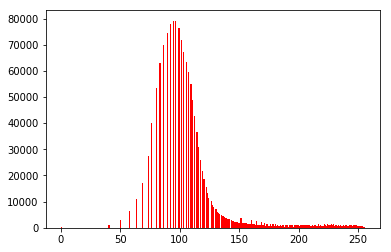

In [12]:
# histogram
plt.hist(img_brighter.flatten(), 256, [0, 256], color='r')
img_yuv = cv2.cvtColor(img_brighter, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0]) # only for 1 channel

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR) # y: luminance/luminosité 明亮度, u&v: 色度饱和度
cv2.imshow('color input image', img_brighter)
cv2.imshow('histogram equalized image', img_output)

key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

### Similarity Transform

In [13]:
# rotation, scale, translation (平移)
M = cv2.getRotationMatrix2D((img_original.shape[1]/2, img_original.shape[0]/2), 30, 1.5) # centering, angle, scale
img_rotate = cv2.warpAffine(img_original, M, (img_original.shape[1], img_original.shape[0])) # apply to the image
cv2.imshow('rotated image', img_rotate)

key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

### Affine Transform

In [14]:
# affine transform
rows, cols, ch = img_original.shape

# 原始点
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows- 1]])
# 目标点
pts2 = np.float32([[cols * 0.2, rows * 0.1], [cols * 0.6, rows * 0.2], [cols * 0.1, rows *0.9]])

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img_original, M, (cols, rows))

cv2.imshow('affine image', dst)

key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

### Perspective Transform

In [15]:
# perspective transform
def random_warp(img, row, col):
    height, width, channels = img.shape
    
    # warp
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width-1-random_margin, width-1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width-1-random_margin, width-1)
    y3 = random.randint(height-1-random_margin, height-1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height-1-random_margin, height-1)
    
    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width-1-random_margin, width-1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width-1-random_margin, width-1)
    dy3 = random.randint(height-1-random_margin, height-1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height-1-random_margin, height-1)
    
    # 原始点
    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    # 目标点
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img, M_warp, (width, height))
    
    return M_warp, img_warp

M_warp, img_warp = random_warp(img_original, img_original.shape[0], img_original.shape[1])
cv2.imshow('warp image', img_warp)

key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()